In [1]:
# ============  Regressor  ============================\n",
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#============== Metric ===========================================
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# ============= Normalization ===================
from sklearn.preprocessing import MinMaxScaler

# ============= Splitting =======================
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# ======================= KOROSI =============================================
data = pd.read_excel(r'Data_Korosi_20_Quadri.xlsx')
data.head()


,Pydz,Conca,Tempa,Phase,TE (eV),HOMO,LUMO,ΔЕ,µ (D),I (eV),A (eV),χ,η,σ (eV-,ΔN,IE,Ref
0,P1,0.001,303,G,-47303.54,-5.821,-2.199,3.622,3.633,5.821,2.199,4.010,1.811,0.552,0.826,97.00,[24]
1,P2,0.001,303,G,-38515.31,-6.575,-1.949,4.626,2.831,6.575,1.949,4.262,2.313,0.432,0.592,91.00,[24]
2,P3,0.001,303,G,-34360.80,-6.583,-1.986,4.597,4.414,6.583,1.986,4.285,2.299,0.435,0.591,87.00,[24]
3,P4,0.001,303,G,-42489.73,-5.247,5.173,10.420,3.607,5.247,-5.173,0.037,5.210,0.192,0.668,93.00,[24]
4,P5,0.002,303,G,-29566.43,-7.420,-2.420,5.001,3.866,7.420,2.420,4.920,2.500,0.400,0.416,95.84,[25]


In [3]:
# Preprosessing
data.columns

Index(['Pydz', 'Conca', 'Tempa', 'Phase', 'TE (eV)', 'HOMO', 'LUMO', 'ΔЕ',
       'µ (D)', 'I (eV)', 'A (eV)', 'χ', 'η', 'σ (eV-', 'ΔN', 'IE', 'Ref'],
      dtype='object')

In [4]:
# Preprosessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pydz     20 non-null     object 
 1   Conca    20 non-null     float64
 2   Tempa    20 non-null     int64  
 3   Phase    20 non-null     object 
 4   TE (eV)  20 non-null     float64
 5   HOMO     20 non-null     float64
 6   LUMO     20 non-null     float64
 7   ΔЕ       20 non-null     float64
 8   µ (D)    20 non-null     float64
 9   I (eV)   20 non-null     float64
 10  A (eV)   20 non-null     float64
 11  χ        20 non-null     float64
 12  η        20 non-null     float64
 13  σ (eV-   20 non-null     float64
 14  ΔN       20 non-null     float64
 15  IE       20 non-null     float64
 16  Ref      20 non-null     object 
dtypes: float64(13), int64(1), object(3)
memory usage: 2.8+ KB


In [5]:
# melihat apakah ada data yang memiliki nilai yang hilang atau nol
print(data.isnull().any())

Pydz       False
Conca      False
Tempa      False
Phase      False
TE (eV)    False
HOMO       False
LUMO       False
ΔЕ         False
µ (D)      False
I (eV)     False
A (eV)     False
χ          False
η          False
σ (eV-     False
ΔN         False
IE         False
Ref        False
dtype: bool


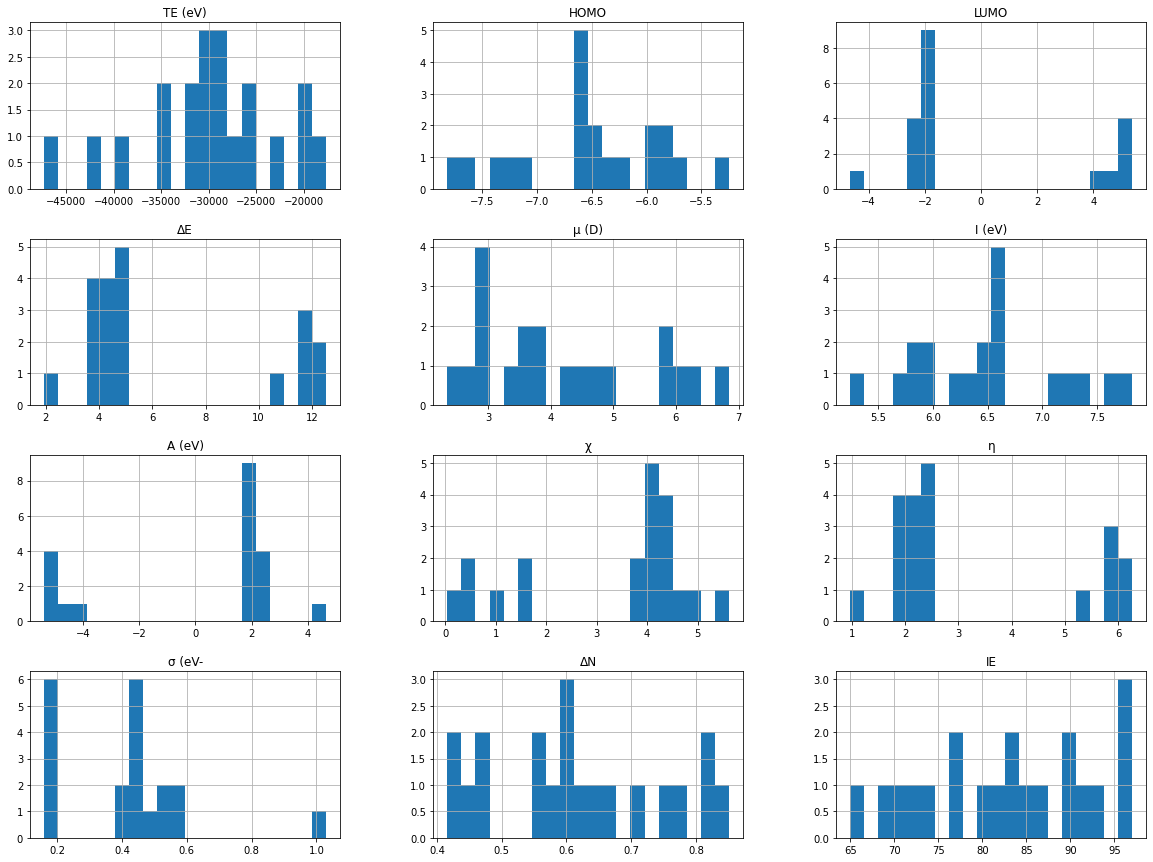

In [6]:
# Histogram sebelum ditambah sampel virtual
# =========================================
data_XY=data[['TE (eV)', 'HOMO', 'LUMO', 'ΔЕ','µ (D)', 'I (eV)', 'A (eV)', 'χ', 'η', 'σ (eV-', 'ΔN', 'IE']]
%matplotlib inline
import matplotlib.pyplot as plt
data_XY.hist(bins=20, figsize=(20,15))
plt.show()

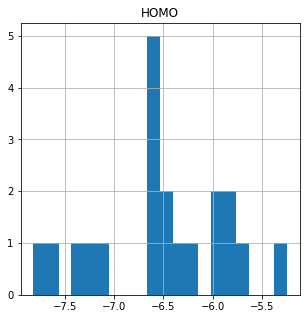

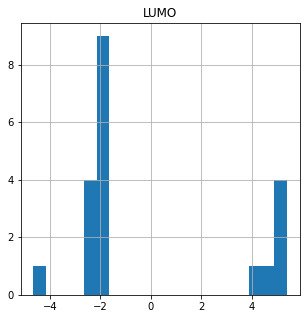

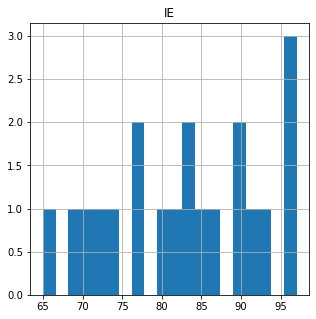

In [7]:
# Histogram sebelum ditambah sampel virtual
# =========================================

%matplotlib inline
import matplotlib.pyplot as plt

data[['HOMO']].hist(bins=20, figsize=(5,5))
data[['LUMO']].hist(bins=20, figsize=(5,5))
data[['IE']].hist(bins=20, figsize=(5,5))

plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LUMO Distribution')

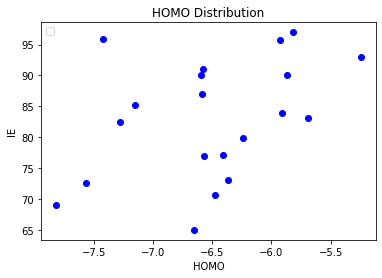

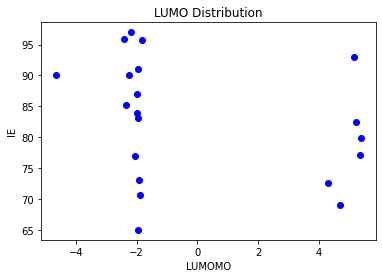

In [8]:
HOMO = data['HOMO'].values
LUMO = data['LUMO'].values
IE   = data['IE'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
#plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMOMO")
plt.title('LUMO Distribution')


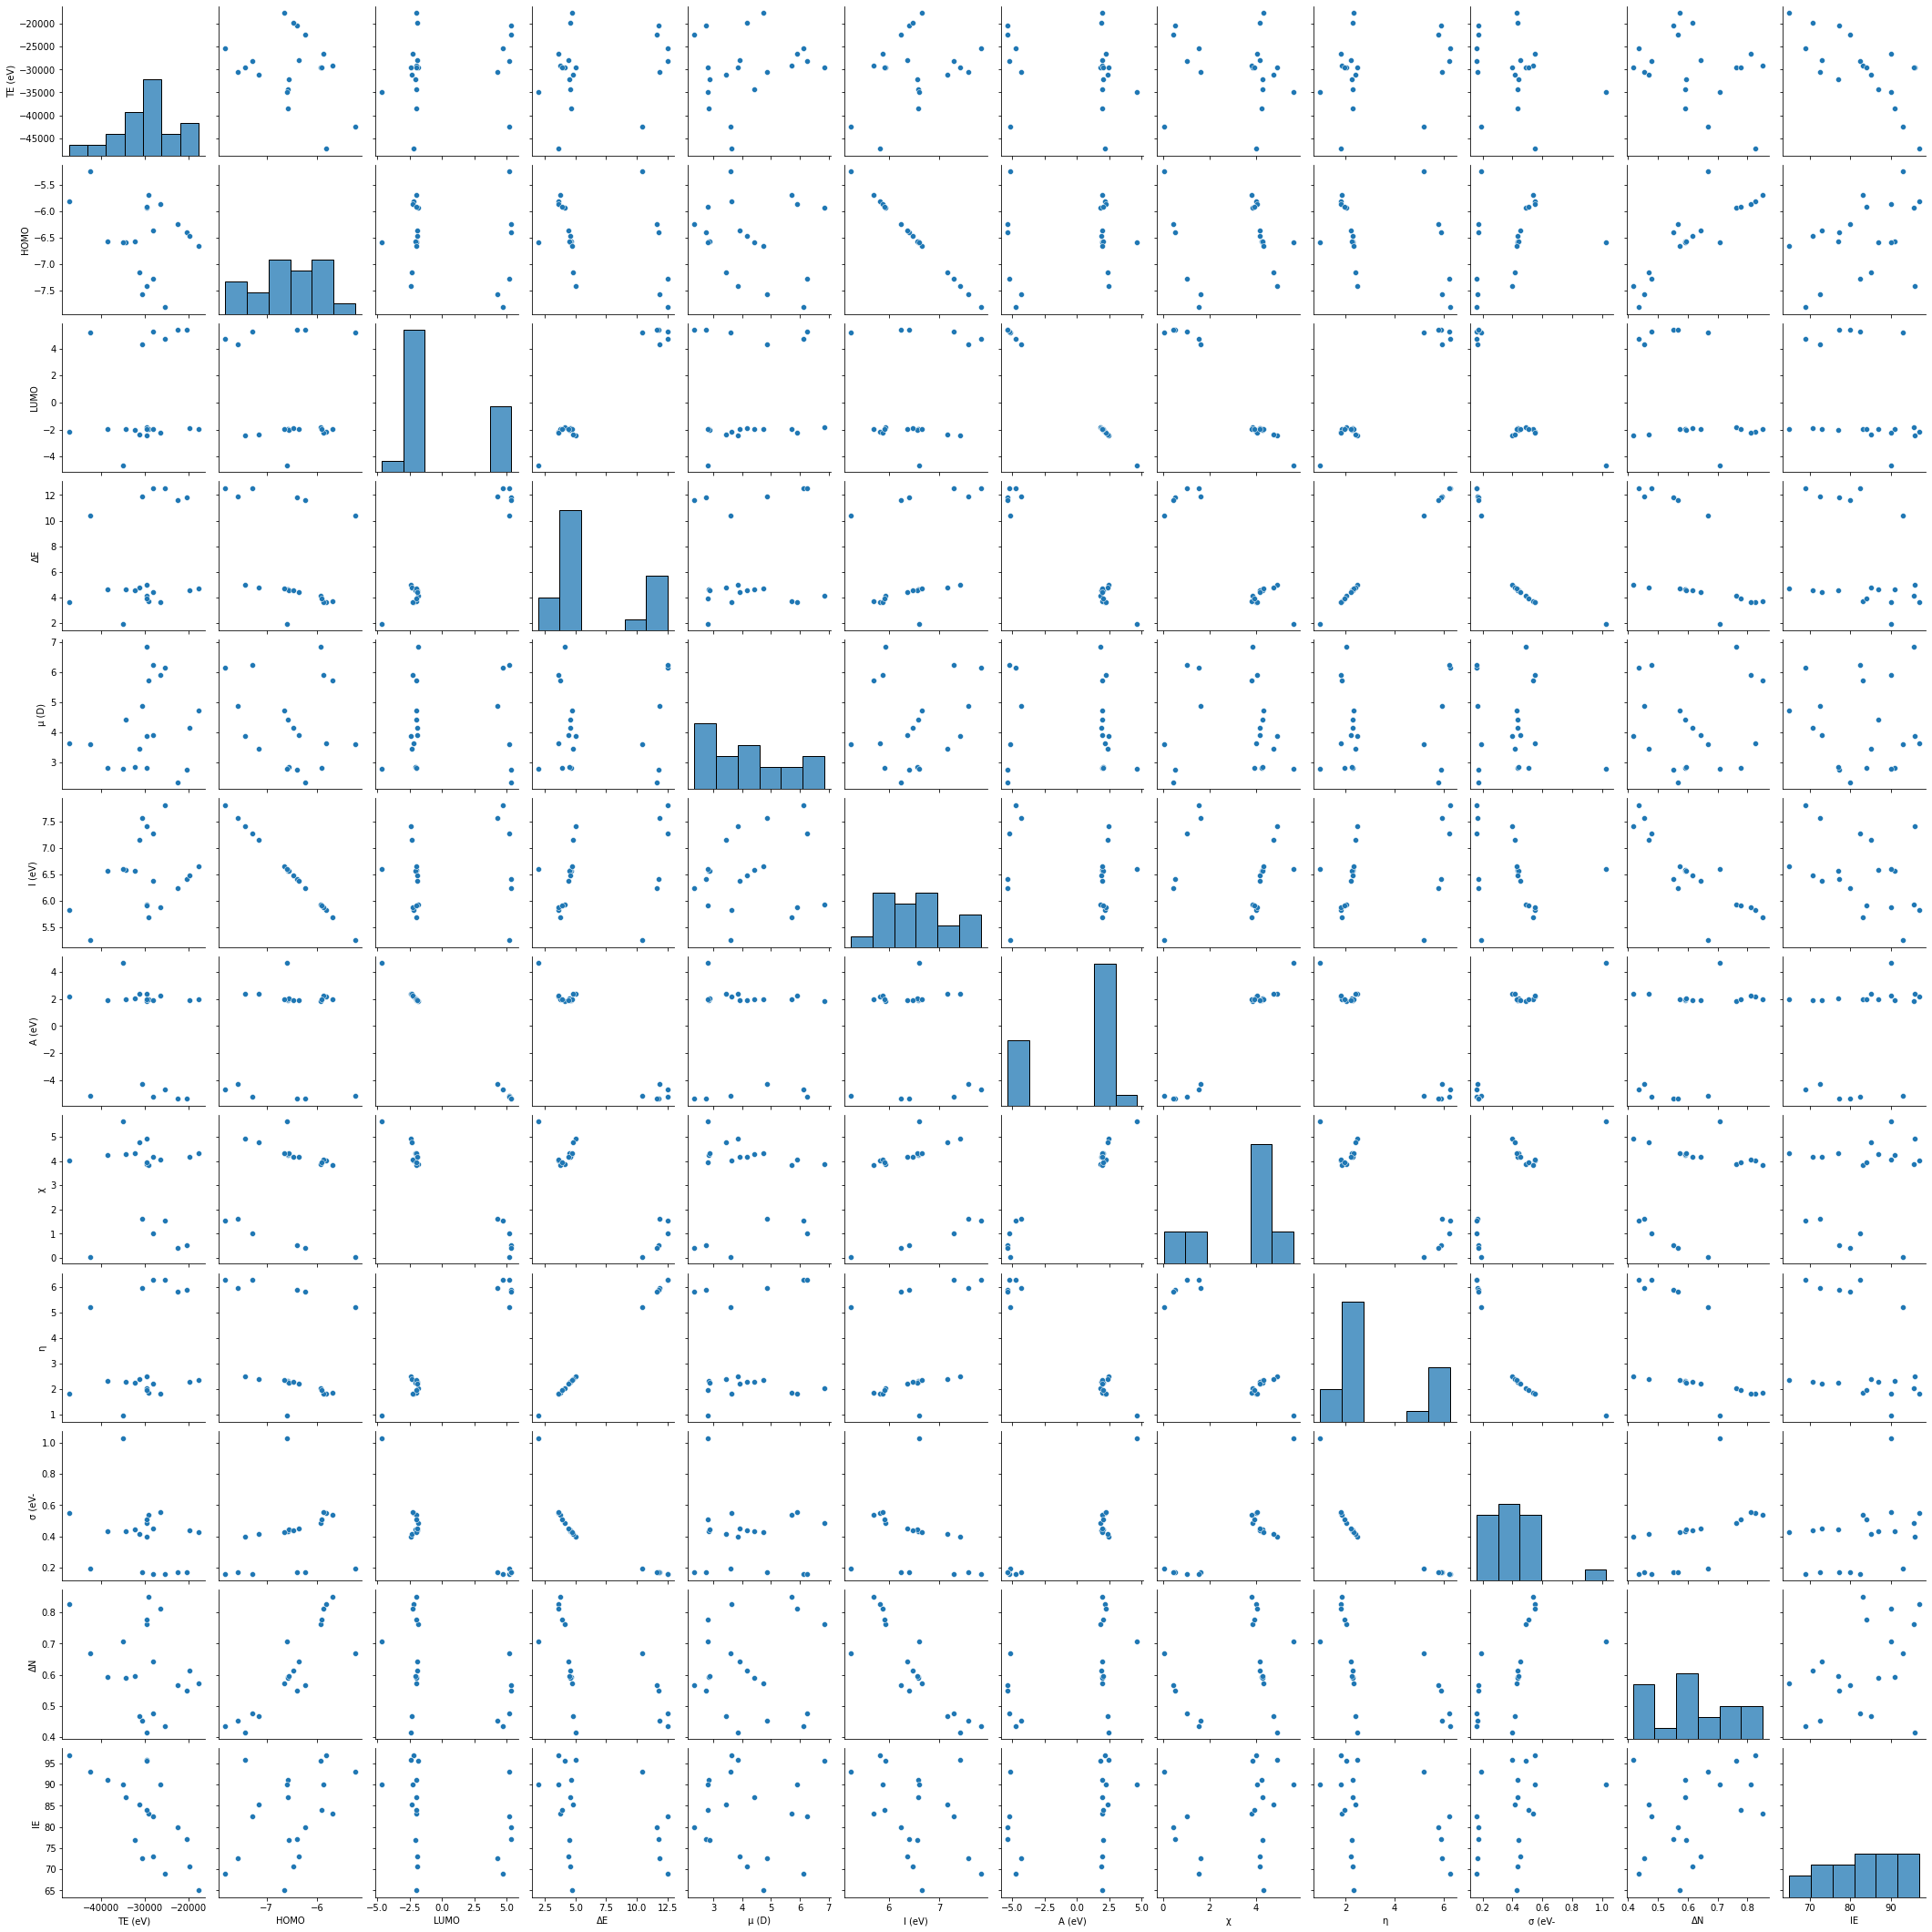

In [9]:
sns.pairplot(data_XY)

In [10]:

# Eliminate unused features:
data_X = data[['TE (eV)', 'HOMO', 'LUMO', 'ΔЕ',
       'µ (D)', 'I (eV)', 'A (eV)', 'χ', 'η', 'σ (eV-', 'ΔN']]        

#extract the labels
data_Y = data['IE']              # Rencana untuk data output (Target)

In [11]:
# Descriptor correlation to target IE: before adding virtual samples
# =======================================================================
from scipy.stats import spearmanr  

kolom_X = ['TE (eV)', 'HOMO', 'LUMO', 'ΔЕ','µ (D)', 'I (eV)', 'A (eV)', 'χ', 'η', 'σ (eV-', 'ΔN']

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = data_X[kolom_X[i]]
    y = data_Y
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % np.round(p,3))
    else:
        print('Samples are correlated (reject H0) p=%.3f' % np.round(p,3))
    print()

TE (eV) :  -0.691
Samples are correlated (reject H0) p=0.001

HOMO :  0.376
Samples are uncorrelated (fail to reject H0) p=0.102

LUMO :  -0.405
Samples are uncorrelated (fail to reject H0) p=0.076

ΔЕ :  -0.396
Samples are uncorrelated (fail to reject H0) p=0.084

µ (D) :  -0.123
Samples are uncorrelated (fail to reject H0) p=0.604

I (eV) :  -0.376
Samples are uncorrelated (fail to reject H0) p=0.102

A (eV) :  0.405
Samples are uncorrelated (fail to reject H0) p=0.076

χ :  0.135
Samples are uncorrelated (fail to reject H0) p=0.571

η :  -0.396
Samples are uncorrelated (fail to reject H0) p=0.084

σ (eV- :  0.391
Samples are uncorrelated (fail to reject H0) p=0.088

ΔN :  0.368
Samples are uncorrelated (fail to reject H0) p=0.111



In [12]:
# ============================================
# Training and testing the Model  
# ============================================
X = data_X.values
Y = data_Y.values

# Initialise the Scaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)  # X_normal

# K-Fold tanpa fungsi polinomial
# ==============================
from sklearn.model_selection import KFold

# data di split 30% : 70%
X_antara, X_test, y_antara, y_test = train_test_split(X, Y, test_size=6, random_state=1) 

# Leave-One -Out adalah  jumlah fold sama dengan jumlah data training
kfold = KFold(n_splits=14, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions


rmsec=[]
rmsecv=[]
rmse  =[]
r1=[]
for train_ix, test_ix in kfold.split(X_antara, y_antara):
    # select rows
    X_train, X_val = X[train_ix], X[test_ix]
    y_train, y_val = Y[train_ix], Y[test_ix]

    #=======================================
    model = KNeighborsRegressor()

    
    model.fit(X_train, y_train)
    y_pred_train  = model.predict(X_train)
    y_pred_test   = model.predict(X_test)
    y_pred_val    = model.predict(X_val)
    
    temp_rmsec    = np.sqrt(mean_squared_error(y_train, y_pred_train))
    temp_rmsecv   = np.sqrt(mean_squared_error(y_val, y_pred_val))
    temp_rmse     = np.sqrt(mean_squared_error(y_test,y_pred_test))
    temp_r1       = r2_score(y_test,y_pred_test)
    #=======================================================================================
    

    rmsec.append(temp_rmsec)
    rmsecv.append(temp_rmsecv)
    rmse.append(temp_rmse)
    r1.append(temp_r1)

#=======================================

# Prediksi Pelatihan
print('Training Predictions')
print('============================')
print('RMSECV', str(model),':',np.round(np.mean(rmsecv),3))
print('RMSE_test', str(model),':',np.round(np.mean(rmse),3))
print('R^2_test    :',np.round(np.mean(r1),3))
print()
print('ANN-Quadri')
print('============================')
print('MSE_test  : 111.5910')
print('RMSE_test : 10.5637')
print('MAPE_test : 10.2362')
print()

# Predicting all of data
# ====================================
y_pred_KNN = model.predict(X)
r2_1     = r2_score(Y,y_pred_KNN)
rmse1 = np.sqrt(mean_squared_error(Y,y_pred_KNN))

# cetak hasil prediksi seluruh data
#print('Predicting all of data')
#print('======================')
#print('RMSE',str(model),' :',np.round(rmse1,3))
#print('R^2 ',str(model),' :',np.round(np.mean(r2_1),3))


Training Predictions
RMSECV KNeighborsRegressor() : 6.871
RMSE_test KNeighborsRegressor() : 12.848
R^2_test    : -0.712

ANN-Quadri
MSE_test  : 111.5910
RMSE_test : 10.5637
MAPE_test : 10.2362



In [13]:
# ======================================================
# HCVSG (Hamiltonian Circuit Virtual Samples Generation)
# ======================================================
X = data_X.values
Y = data_Y.values

In [14]:
def Xmin_Xmax(X):  #mencari nilai min dan max tiap-tiap kolom
    X_min=[]
    X_max=[]
    for i in range(len(X[1,:])):   # baris ke-1, semua kolom \n",
        X_min=X_min + [np.min(X[0:, i:i+1])]  #mengambil nilai min pd setiap kolom
        X_max=X_max + [np.max(X[0:, i:i+1])]  #mengambil nilai max pd setiap kolom
    
    X_min=np.array(X_min)
    X_max=np.array(X_max)
    return X_min, X_max
    
def Gabung_X_Xmin_Xmax(X, X_min, X_max): #data digabung dg min max sbg patokan
    X = np.vstack((X,X_min))
    X = np.vstack((X,X_max))
    return X
    
def Normalisasi(X):
    scaler = MinMaxScaler()
    normal = scaler.fit_transform(X)
    return normal
    
def Split_X_Xmin_Xmax(X):
    X=X[0:-2,:]  # dua baris terakhir dibuang
    return X
    
def preprosesing(X, X_min, X_max):
    Gabung = Gabung_X_Xmin_Xmax(X, X_min, X_max)
    Normal = Normalisasi(Gabung)
    Split_normal = Split_X_Xmin_Xmax(Normal)
    return Split_normal

def Denormalisasi(X_normal,X_min, X_max):
    X = np.vstack((X_min, X_max))
    scaler = MinMaxScaler()
    scaler.fit_transform(X)
    X_inv = scaler.inverse_transform(X_normal)
    return X_inv



In [15]:
X_min, X_max = Xmin_Xmax(X)  #mencari nilai min dan max tiap-tiap kolom

In [16]:
regressor_Non_VSG = KNeighborsRegressor(1)
regressor_VSG = KNeighborsRegressor(1)

In [18]:
# ==========================  Searching of HCVSG ==========================

J_sampel = [14]   #jumlah sampel training    
Batas    = 2  # Theta

Seed_angka = 1 + np.arange(1000)

for Jumlah_sampel in J_sampel:
    
    # ================================= Pengambilan sampel Training ====================================================\n",
    for Random_Data_Split in Seed_angka:
        
        # 1 Dtrain > 9 jalur
        Rand_D_Split  = []
        Rand_VSGP     = []
        Kinerja1 = []
        Kinerja2 = []
        Counter  = 0
        
        Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)
        x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split)
        
        x_tr   = preprosesing(x_t, X_min, X_max)
        x_test = preprosesing(x_uji, X_min, X_max)
        y_tr   = y_t.reshape(-1,1)
        y_test = y_uji.reshape(-1,1)
        
        # ==========  Predict Non VSG ===================================\n",
        regressor_Non_VSG.fit(x_tr, y_tr) #training the algorithm\n",
        y_pred_Non_VSG = regressor_Non_VSG.predict(x_test)
        # =======================================================\n",
        
        
        No_bil_acak = 1+ np.arange(500) 
        # =================================  Pengacakan posisi Array ==========================\n",
        for Random_VSGP in No_bil_acak:
            
            x_latih, y_latih = shuffle(x_tr, y_tr, random_state= Random_VSGP)   # Posisi Array diacak\n",          
            y_latih  = y_latih.reshape(-1,1)
            #agar posisi terakhir terhubung dg posisi awal\n",
            x_latih = np.vstack(([x_latih,x_latih[0]]))         
            y_latih = np.vstack(([y_latih,y_latih[0]]))
            
            Juml_fitur=len(X[0])      
            X1= np.zeros(Juml_fitur);     
            Y1=[0];  
            

            # ==================== Awal VSG      ===================================\n",


            SISIPAN = 10  #2,3,4,5,6,7,8,9,10,15,20]#,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
            
            for i in range (len(x_latih)-1):

                for j in range(SISIPAN):             
                    t=(j)/(SISIPAN)

                    temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
                    temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])
                    #=======================================================================\n",

                    X1=np.vstack((X1,temp_x))  
                    Y1=np.vstack((Y1,temp_y)) 

                # ===============================================================\n",
            #===for i in range (len(x_latih)==============================\n",
            
            
            X1=X1[1:] #menghilangkan inisialisasi X[0]
            Y1=Y1[1:] #menghilangkan inisialisasi Y[0]
        
            # ============== Predict VSG =========================\n",

            regressor_VSG.fit(X1, Y1) #training the algorithm\n",
            y_pred_VSG = regressor_VSG.predict(x_test)
            # ====================================================\n",
            

            # ========================   RMSE ================================================================   \n",
            temp1 = np.sqrt(mean_squared_error(y_test,y_pred_Non_VSG))   # RMSE\n",
            temp2 = np.sqrt(mean_squared_error(y_test,y_pred_VSG))       # RMSE\n",
            # =================================================================================================\n",
            

            if (temp2 < temp1) and (temp2 < Batas):  
                Counter = Counter + 1
                Rand_D_Split.append(Random_Data_Split)
                Rand_VSGP.append(Random_VSGP)
                Kinerja1.append(np.round(temp1,3) )
                Kinerja2.append(np.round(temp2,3) )
                print('HCVSG: ',Counter)
                print('Random_Data_Split: ',Random_Data_Split)
                print('Random_HCVSG: ',Random_VSGP)
                print('RMSE of KNN: ',np.round(np.mean(temp1),3))
                print('RMSE of KNN + VSG : ',np.round(np.mean(temp2),3))
                print()
                print()
            if Counter > 8: break  # 1 Dtrain ada 10 jalur
                
            #=======================================
        # ======================= FOR Random VSGP =========================================    
        if Counter > 8: break
        
    # ========================== FOR Random Split =========================================

# ========================================================================================\n",
print('Method: ', str(regressor_Non_VSG))
print('============================================')
print('number of training samples = ',J_sampel[0])
print('Threshold Theta            = ',Batas)
print('Random_Data_Split          = ',Rand_D_Split)
print('Random_HCVSG               = ',Rand_VSGP)
print('RMSE of KNN                = ',np.round(np.mean(Kinerja1),3))
print('RMSE of KNN+VSG            = ',np.round(np.mean(Kinerja2),3))
print()

HCVSG:  1
Random_Data_Split:  150
Random_HCVSG:  68
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.849


HCVSG:  2
Random_Data_Split:  150
Random_HCVSG:  73
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.851


HCVSG:  3
Random_Data_Split:  150
Random_HCVSG:  74
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.991


HCVSG:  4
Random_Data_Split:  150
Random_HCVSG:  195
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.384


HCVSG:  5
Random_Data_Split:  150
Random_HCVSG:  256
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.736


HCVSG:  6
Random_Data_Split:  150
Random_HCVSG:  299
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.921


HCVSG:  7
Random_Data_Split:  150
Random_HCVSG:  421
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.833


HCVSG:  8
Random_Data_Split:  150
Random_HCVSG:  438
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.934


HCVSG:  9
Random_Data_Split:  150
Random_HCVSG:  492
RMSE of KNN:  10.826
RMSE of KNN + VSG :  1.859


Method:  KNeighborsRegressor(n_neighbors=1)
number of training samples =  14

In [ ]:
'''
Method:  KNeighborsRegressor(n_neighbors=1)
============================================
number of training samples =  14
Threshold Theta            =  2
Random_Data_Split          =  [150, 150, 150, 150, 150, 150, 150, 150, 150]
Random_HCVSG               =  [68, 73, 74, 195, 256, 299, 421, 438, 492]
RMSE of KNN                =  10.826
RMSE of KNN+VSG            =  1.818
'''

### A pair of Random_Data_Split and Random_HCVSG is called HCVSG, used for generate virtual samples

In [19]:
# Pembuatan Sampel Virtual : 30% : 70%
# JANGAN LUPA !!!!!!!
# X harus dilakukan: preprosesing(X, X_min, X_max)
# ==================================================

X = data_X.values
Y = data_Y.values

X_normal = preprosesing(X, X_min, X_max)


Juml_fitur=len(X[0])      
X1= np.zeros(Juml_fitur);     
Y1=[0];  
rmse=[] #untuk pelatihan
R2  =[] #untuk pelatihan

Random_Data_Split          =  [150, 150, 150, 150, 150, 150, 150, 150, 150]
Random_HCVSG               =  [68, 73, 74, 195, 256, 299, 421, 438, 492]

Jumlah_sampel = 14
Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)

for k in range(len(Random_HCVSG)):
    x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split[k]) #versi lama
    
 
    x_tr   = preprosesing(x_t, X_min, X_max)
    x_test = preprosesing(x_uji, X_min, X_max)
    y_tr=y_t.reshape(-1,1)
    y_test=y_uji.reshape(-1,1)


# =================================  Pengacakan posisi Array ==========================

                           
    x_, y_ = shuffle(x_tr, y_tr, random_state= Random_HCVSG[k])   # Posisi Array diacak
         
    y_latih  = y_.reshape(-1,1)
    x_latih  = x_
    #agar posisi terakhir terhubung dg posisi awal
    x_latih = np.vstack(([x_latih,x_latih[0]]))         
    y_latih = np.vstack(([y_latih,y_latih[0]]))
    
    # ==================== Awal VSG      ===================================
    XA= np.zeros(Juml_fitur);   #untuk pelatihan  
    YA=[0];                     #untuk pelatihan
    
    SISIPAN = 10
    for i in range (len(x_latih)-1):

        for j in range(SISIPAN):             
            t=(j+1)/(SISIPAN+1)                      
            temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
            temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])            
            #=======================================================================
                        
            X1=np.vstack((X1,temp_x))  #simpan seluruh vs
            Y1=np.vstack((Y1,temp_y))  #simpan seluruh vs
            
            XA=np.vstack((XA,temp_x))  #simpan untuk pelatihan
            YA=np.vstack((YA,temp_y))  #simpan untuk pelatihan

        # ===============================================================
    # ===================================================================
    
    
    #=== Untuk Data Pelatihan =================
    XA=XA[1:] #menghilangkan inisialisasi X[0]
    YA=YA[1:] #menghilangkan inisialisasi Y[0]
    XA1=np.vstack((XA,x_tr))  # sampel virtual digabung dengan data training
    YA1=np.vstack((YA,y_tr))  # sampel virtual digabung dengan data training
    
    model = KNeighborsRegressor(1)
    
    model.fit(XA1,YA1)
    y_pred=model.predict(x_test)
    temp1 = np.sqrt(mean_squared_error(y_test,y_pred))
    temp2 = r2_score(y_test,y_pred)
    rmse.append(temp1)
    R2.append(temp2)
    #============================================================
    
# ===============================================================
X1=X1[1:] #menghilangkan inisialisasi X[0]
Y1=Y1[1:] #menghilangkan inisialisasi Y[0]

X1=np.vstack((X1,x_tr))  # sampel virtual digabung dengan data training
Y1=np.vstack((Y1,y_tr))  # sampel virtual digabung dengan data training

rmse_cv = np.round(np.mean(rmse),3)  
R2_cv   = np.round(np.mean(R2),3)
print('RMSECV KNN+VSG:',rmse_cv)
#print('R-Squared     :',R2_cv)

RMSECV KNN+VSG: 1.854


### Model testing

In [22]:
model = KNeighborsRegressor()

model.fit(X1, Y1)
# ==================================================

X = data_X.values
Y = data_Y.values
X_min, X_max = Xmin_Xmax(X)
X_normal   = preprosesing(X, X_min, X_max)

# RMSE for testing 
# ====================================================================================================
x_train, x_test, y_train, y_test = train_test_split(X_normal, Y, test_size=6, random_state=1)
y_pred_VSG_train = model.predict(x_train)
y_pred_VSG_test  = model.predict(x_test)

RMSE_test        = np.sqrt(mean_squared_error(y_test,y_pred_VSG_test))       # RMSE\n",
r2_test          = r2_score(y_test,y_pred_VSG_test)

# RMSE for all of Data
# ====================================================================================================
X_normal    = preprosesing(X, X_min, X_max)
y_pred_VSG  = np.round(model.predict(X_normal).flatten(),2)


r2_1  = r2_score(Y,y_pred_VSG)
rmse1 = np.sqrt(mean_squared_error(Y,y_pred_VSG))

print('Prediction of testing data')
print('RMSE test KNN+VSG:', np.round(RMSE_test,3))
print('R^2  test KNN+VSG:', np.round(r2_test,3))

print()
print('============= Prediction of all data =============')
print('RMSE KNN+VSG:',np.round(rmse1,3))
print('R^2  KNN+VSG:', np.round(r2_1,3))
print()




Prediction of testing data
RMSE test KNN+VSG: 1.135
R^2  test KNN+VSG: 0.987

============= Prediction of all data =============
RMSE KNN+VSG: 1.065
R^2  KNN+VSG: 0.987



### Plotting

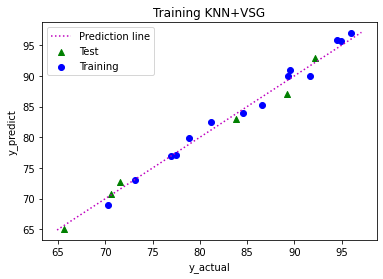

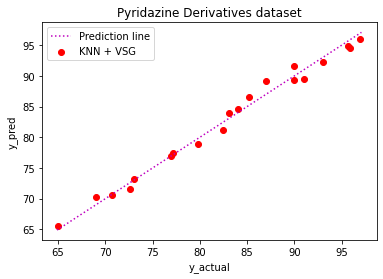

In [23]:
xline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))
yline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))

plt.figure()
plt.scatter(y_pred_VSG_test,y_test,    c='g', marker = '^', label = "Test")
plt.scatter(y_pred_VSG_train,y_train , c='b', label = "Training")
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_predict") 
plt.title('Training KNN+VSG')
plt.show()

# Buat grafik VSG dan VSG utk seluruh data
plt.figure()
plt.scatter(Y, y_pred_VSG,    c='r', label = 'KNN + VSG')
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("y_pred")
plt.xlabel("y_actual") 
plt.title('Pyridazine Derivatives dataset')
plt.show()




### Histogram after adding virtual samples

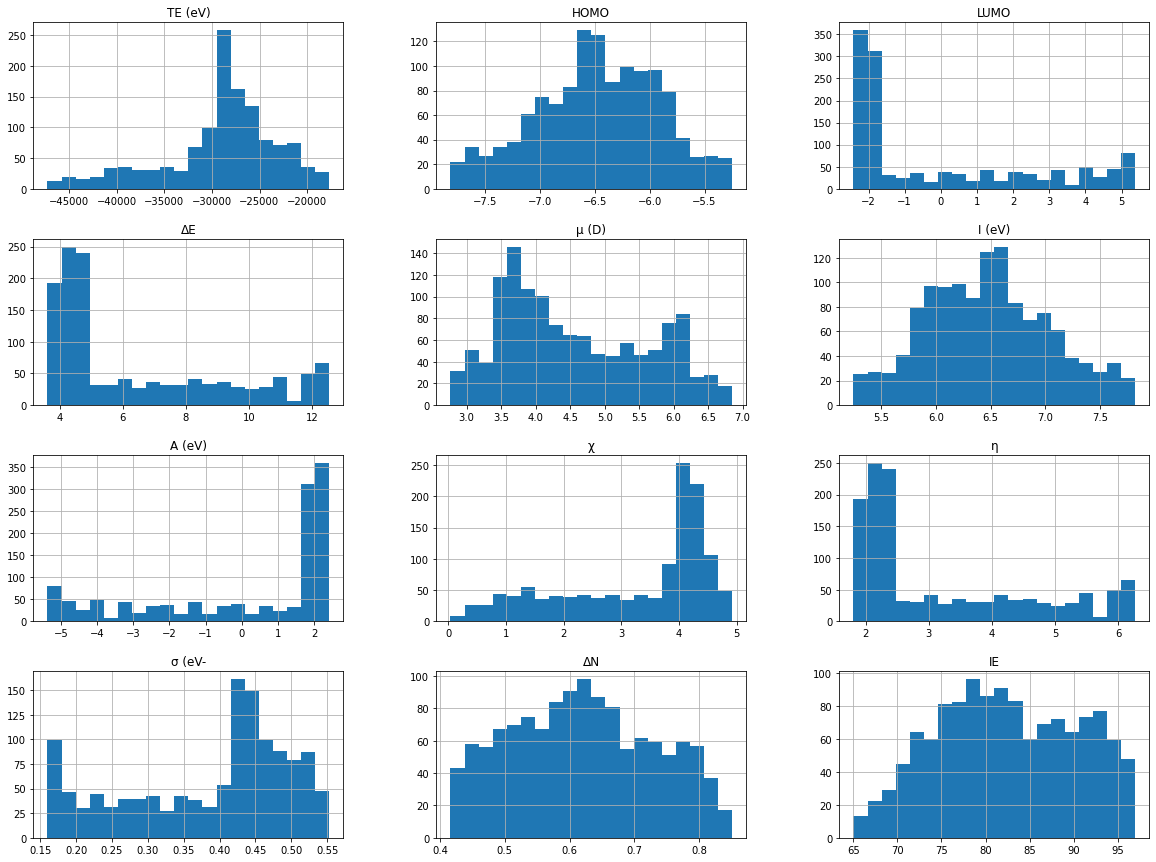

In [24]:
# Histogram setelah ditambah sampel virtual

import pandas as pd
kolom_XY = ['TE (eV)', 'HOMO', 'LUMO', 'ΔЕ',
       'µ (D)', 'I (eV)', 'A (eV)', 'χ', 'η', 'σ (eV-', 'ΔN', 'IE']

# utk kebutuhan grafik, X1 hrs di invers supaya besarannya kembali seperti semula
X_inv=Denormalisasi(X1,X_min, X_max)
X_inv = np.round_(X_inv, decimals = 3)
Y_inv=np.round_(Y1, decimals = 3)
Data_VSG = np.hstack((X_inv,Y_inv))
Data_VSG_XY = pd.DataFrame(Data_VSG, columns=kolom_XY)
Data_VSG_XY.hist(bins=20, figsize=(20,15))
plt.show()

In [25]:
# Correlation between descriptors and targets (IE)
from scipy.stats import spearmanr  

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = Data_VSG_XY[kolom_X[i]]
    y = Y1
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        print()
    else:        
        print('Samples are correlated (reject H0) p=%.3f' % p)
        print()


TE (eV) :  -0.684
Samples are correlated (reject H0) p=0.000

HOMO :  0.377
Samples are correlated (reject H0) p=0.000

LUMO :  -0.234
Samples are correlated (reject H0) p=0.000

ΔЕ :  -0.273
Samples are correlated (reject H0) p=0.000

µ (D) :  0.0
Samples are uncorrelated (fail to reject H0) p=0.997

I (eV) :  -0.377
Samples are correlated (reject H0) p=0.000

A (eV) :  0.234
Samples are correlated (reject H0) p=0.000

χ :  0.038
Samples are uncorrelated (fail to reject H0) p=0.170

η :  -0.273
Samples are correlated (reject H0) p=0.000

σ (eV- :  0.302
Samples are correlated (reject H0) p=0.000

ΔN :  0.361
Samples are correlated (reject H0) p=0.000



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Distribution of energy LUMO ')

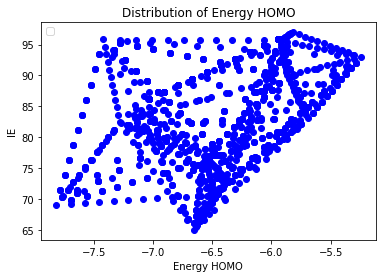

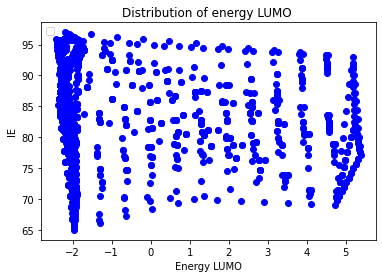

In [26]:
# Distribution of HOMO and LUMO after adding virtual samples
HOMO = Data_VSG_XY['HOMO'].values
LUMO = Data_VSG_XY['LUMO'].values
IE   = Data_VSG_XY['IE'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Energy HOMO")
plt.title('Distribution of Energy HOMO')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Energy LUMO")
plt.title('Distribution of energy LUMO ')


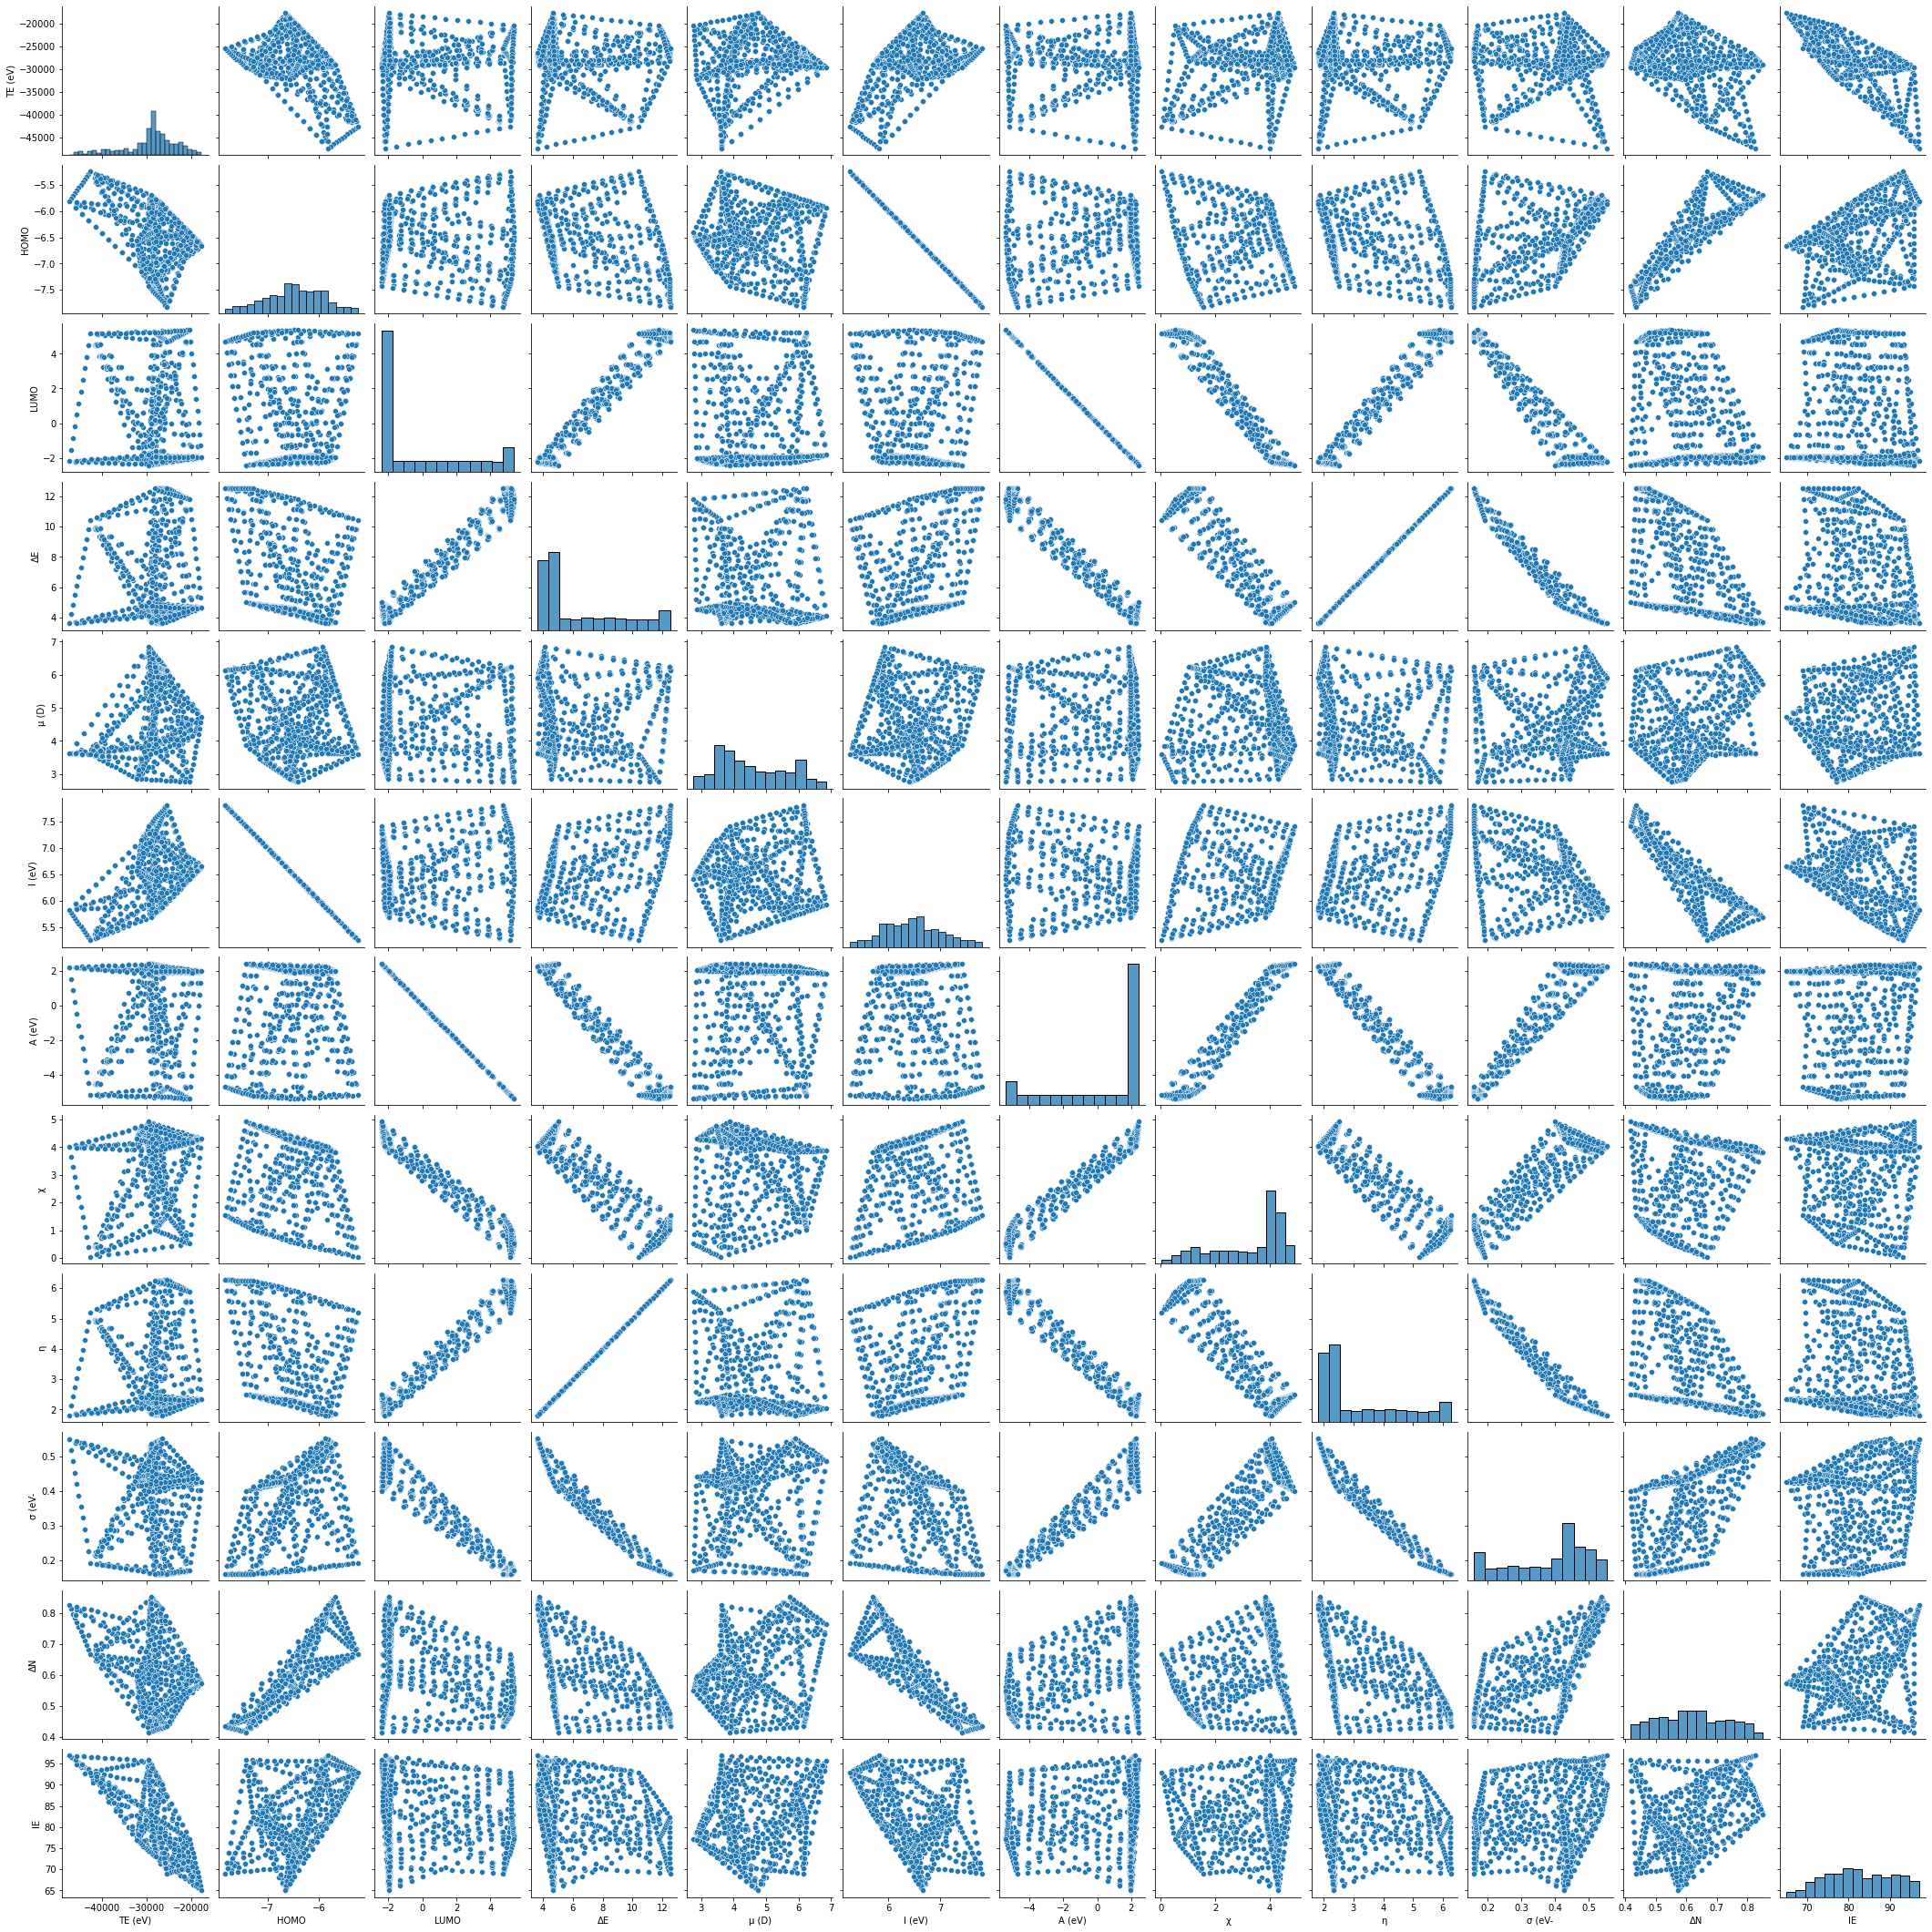

In [27]:
sns.pairplot(Data_VSG_XY)